# Lab 3: Fitbit Sleep Data

GSB 545

Week 3

Stephanie Liu


**Lab Description:** 

In this lab you'll be doing a bit more of a comprehensive analysis. Despite coming from Kaggle, this will not be a competition. Check out the data source and context here:

https://www.kaggle.com/datasets/riinuanslan/sleep-data-from-fitbit-tracker (Links to an external site.)

It's a relative simple dataset, but your goal is this: 

Can we predict Sleep Score (posted by the FitBit app) using the other metrics in the dataset? In other words, is there a formula here that the FitBit app uses to compute Sleep Score that we can reverse-engineer?
Two constraints for this assignment:

1. Your modeling efforts must involve bagging and stacking in some way. Otherwise, you may try whatever you like.

2. You are allowed, even encouraged, to compute and/or gather additional features to use as explanatory variables in your model. For example, you might create a variable for the time they went to sleep (as a measure of how "early" they went to bed, or not). There are multiple datasets and you should use all of them, which means you may use the corresponding month for the dataset as a variable as well (or anything related to it).



## Data

In [233]:
# read in datasets
import pandas as pd

Nov_Data = pd.read_csv("/content/November Sleep Data - Sheet1.csv")
Dec_Data = pd.read_csv("/content/December Sleep data - Sheet1.csv")
Jan_Data = pd.read_csv("/content/January sleep data - Sheet1.csv")
Feb_Data = pd.read_csv("/content/February sleep data - Sheet1 (1).csv")

In [234]:
Nov_Data
Dec_Data
Jan_Data
Feb_Data

,FEBEUARY,DATE,SLEEP SQORE,HOURS OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING,SLEEP TIME
0,Tuesday,02/01/2022,87,7:30:00,18.00%,17.00%,98.00%,10:18pm - 7:11am
1,Wednesday,02/02/2022,90,7:27:00,20.00%,18.00%,88.00%,10:21pm - 6:50am
2,Thursday,02/03/2022,66,5:39:00,16.00%,0.00%,13.00%,11:00pm - 5:29am
3,Friday,02/04/2022,87,9:13:00,18.00%,19.00%,96.00%,11:09pm - 9:56am
4,Saturday,02/05/2022,85,6:50:00,23.00%,19.00%,93.00%,12:41am - 8:20am
5,Sunday,02/06/2022,78,6:43:00,17.00%,18.00%,70.00%,12:12am - 8:05am
6,Monday,02/07/2022,87,8:16:00,19.00%,15.00%,79.00%,10:33pm - 7:47am
7,Tuesday,02/08/2022,83,6:41:00,23.00%,15.00%,94.00%,12:12am - 7:52am
8,Wednesday,02/09/2022,81,7:18:00,21.00%,13.00%,89.00%,11:13pm - 7:45am
9,Thursday,02/10/2022,83,6:35:00,20.00%,21.00%,85.00%,10:24pm - 5:58am


In [235]:
Nov_Data['Month'] = 'November'
Dec_Data['Month'] = 'December'
Jan_Data['Month'] = 'January'
Feb_Data['Month'] = 'February'

In [236]:
Nov_Data.dtypes

NOVEMBER                     object
DATE                         object
SLEEP SCORE                 float64
HOURS OF SLEEP               object
REM SLEEP                    object
DEEP SLEEP                   object
HEART RATE BELOW RESTING     object
SLEEP TIME                   object
Month                        object
dtype: object

In [237]:
Dec_Data.dtypes

DECEMBER                     object
DATE                         object
SLEEP SCORE                 float64
HOURS OF SLEEP               object
REM SLEEP                    object
DEEP SLEEP                   object
HEART RATE BELOW RESTING     object
SLEEP TIME                   object
Month                        object
dtype: object

In [238]:
Jan_Data.dtypes

JANUARY                      object
DATE                         object
SLEEP SCORE                 float64
HOURS OF SLEEP               object
REM SLEEP                    object
DEEP SLEEP                   object
HEART RATE UNDER RESTING     object
SLEEP TIME                   object
Month                        object
dtype: object

In [239]:
Feb_Data.dtypes

FEBEUARY                    object
DATE                        object
SLEEP SQORE                  int64
HOURS OF SLEEP              object
REM SLEEP                   object
DEEP SLEEP                  object
HEART RATE BELOW RESTING    object
SLEEP TIME                  object
Month                       object
dtype: object

### Combine Datasets

Let's prep each dataset so that it is easier to combine them.

In [240]:
# make column names of each dataset consistant with each other
Nov_Data.rename(columns={'NOVEMBER': 'DAY OF WEEK'}, inplace=True)

Dec_Data.rename(columns={'DECEMBER': 'DAY OF WEEK'}, inplace=True)

Jan_Data.rename(columns={'JANUARY': 'DAY OF WEEK', 'HEART RATE UNDER RESTING': 'HEART RATE BELOW RESTING'}, inplace=True)

Feb_Data.rename(columns={'FEBEUARY': 'DAY OF WEEK', 'SLEEP SQORE': 'SLEEP SCORE'}, inplace=True)

In [241]:
# drop first row of all NA values
# fitbit_Data = fitbit_Data.drop([0])
Nov_Data = Nov_Data.drop([0])
Dec_Data = Dec_Data.drop([0])
Jan_Data = Jan_Data.drop([0])
Feb_Data = Feb_Data.drop([0])

In [242]:
# combine the four datasets into one
fitbit_Data = pd.concat([Nov_Data, Dec_Data, Jan_Data, Feb_Data], ignore_index=True)

In [243]:
fitbit_Data.rename(str.lower, axis='columns', inplace=True)
fitbit_Data.rename(columns={'day of week': 'day_of_week', 
                            'sleep score': 'sleep_score', 
                            'hours of sleep': 'hours_of_sleep', 
                            'rem sleep': 'rem_sleep',
                            'deep sleep': 'deep_sleep',
                            'heart rate below resting': 'heart_rate_below_resting',
                            'sleep time': 'sleep_time'}, inplace=True)

fitbit_Data

,day_of_week,date,sleep_score,hours_of_sleep,rem_sleep,deep_sleep,heart_rate_below_resting,sleep_time,month
0,Monday,11/1/2021,88.0,8:06:00,20.00%,13.00%,84.00%,10:41pm - 7:54am,November
1,Tuesday,11/2/2021,83.0,7:57:00,12.00%,18.00%,90.00%,10:40pm - 7:55am,November
2,Wednesday,11/3/2021,81.0,7:06:00,13.00%,22.00%,93.00%,11:03pm - 7:16am,November
3,Thursday,11/4/2021,86.0,7:04:00,19.00%,17.00%,97.00%,10:55pm - 6:56am,November
4,Friday,11/5/2021,81.0,9:24:00,17.00%,15.00%,66.00%,10:14pm - 9:01am,November
...,...,...,...,...,...,...,...,...,...
114,Thursday,02/24/2022,84.0,7:18:00,19.00%,19.00%,96.00%,10:23pm - 6:43am,February
115,Friday,02/25/2022,90.0,7:46:00,20.00%,21.00%,98.00%,10:28pm - 7:15am,February
116,Saturday,02/26/2022,82.0,8:02:00,16.00%,16.00%,57.00%,11:05pm - 8:10am,February
117,Sunday,02/27/2022,85.0,8:54:00,18.00%,17.00%,81.00%,9:59pm - 8:11am,February


### Data Wrangling

Note that in this datset, only the sleep score is recorded as a float (all others are seen as objects). We would want other variables, such as *hours_of_sleep*, *rem_sleep*, *deep_sleep*, and *heart_rate_below_resting* to all be numeric. In addition, we may want to do something with the *sleep_time* (perhaps calculate the percent of *sleep_time* is actually spent sleeping - from the *hours_of_sleep* variable). 

In [244]:
# change the hours_of_sleep variable into numeric values
fitbit_Data[['hours','minutes','seconds']] = fitbit_Data['hours_of_sleep'].str.split(":", n = 2, expand = True)
fitbit_Data['hours'] = fitbit_Data['hours'].astype(float)
fitbit_Data['minutes'] = fitbit_Data['minutes'].astype(float)
fitbit_Data['seconds'] = fitbit_Data['seconds'].astype(float)

fitbit_Data

,day_of_week,date,sleep_score,hours_of_sleep,rem_sleep,deep_sleep,heart_rate_below_resting,sleep_time,month,hours,minutes,seconds
0,Monday,11/1/2021,88.0,8:06:00,20.00%,13.00%,84.00%,10:41pm - 7:54am,November,8.0,6.0,0.0
1,Tuesday,11/2/2021,83.0,7:57:00,12.00%,18.00%,90.00%,10:40pm - 7:55am,November,7.0,57.0,0.0
2,Wednesday,11/3/2021,81.0,7:06:00,13.00%,22.00%,93.00%,11:03pm - 7:16am,November,7.0,6.0,0.0
3,Thursday,11/4/2021,86.0,7:04:00,19.00%,17.00%,97.00%,10:55pm - 6:56am,November,7.0,4.0,0.0
4,Friday,11/5/2021,81.0,9:24:00,17.00%,15.00%,66.00%,10:14pm - 9:01am,November,9.0,24.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
114,Thursday,02/24/2022,84.0,7:18:00,19.00%,19.00%,96.00%,10:23pm - 6:43am,February,7.0,18.0,0.0
115,Friday,02/25/2022,90.0,7:46:00,20.00%,21.00%,98.00%,10:28pm - 7:15am,February,7.0,46.0,0.0
116,Saturday,02/26/2022,82.0,8:02:00,16.00%,16.00%,57.00%,11:05pm - 8:10am,February,8.0,2.0,0.0
117,Sunday,02/27/2022,85.0,8:54:00,18.00%,17.00%,81.00%,9:59pm - 8:11am,February,8.0,54.0,0.0


In [245]:
# Change columns with % to float-decimals
fitbit_Data['rem_sleep'] = fitbit_Data['rem_sleep'].str.rstrip('%').astype('float') / 100.0
fitbit_Data['deep_sleep'] = fitbit_Data['deep_sleep'].str.rstrip('%').astype('float') / 100.0
fitbit_Data['heart_rate_below_resting'] = fitbit_Data['heart_rate_below_resting'].str.rstrip('%').astype('float') / 100.0

fitbit_Data

,day_of_week,date,sleep_score,hours_of_sleep,rem_sleep,deep_sleep,heart_rate_below_resting,sleep_time,month,hours,minutes,seconds
0,Monday,11/1/2021,88.0,8:06:00,0.20,0.13,0.84,10:41pm - 7:54am,November,8.0,6.0,0.0
1,Tuesday,11/2/2021,83.0,7:57:00,0.12,0.18,0.90,10:40pm - 7:55am,November,7.0,57.0,0.0
2,Wednesday,11/3/2021,81.0,7:06:00,0.13,0.22,0.93,11:03pm - 7:16am,November,7.0,6.0,0.0
3,Thursday,11/4/2021,86.0,7:04:00,0.19,0.17,0.97,10:55pm - 6:56am,November,7.0,4.0,0.0
4,Friday,11/5/2021,81.0,9:24:00,0.17,0.15,0.66,10:14pm - 9:01am,November,9.0,24.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
114,Thursday,02/24/2022,84.0,7:18:00,0.19,0.19,0.96,10:23pm - 6:43am,February,7.0,18.0,0.0
115,Friday,02/25/2022,90.0,7:46:00,0.20,0.21,0.98,10:28pm - 7:15am,February,7.0,46.0,0.0
116,Saturday,02/26/2022,82.0,8:02:00,0.16,0.16,0.57,11:05pm - 8:10am,February,8.0,2.0,0.0
117,Sunday,02/27/2022,85.0,8:54:00,0.18,0.17,0.81,9:59pm - 8:11am,February,8.0,54.0,0.0


In [246]:
fitbit_Data.dtypes

day_of_week                  object
date                         object
sleep_score                 float64
hours_of_sleep               object
rem_sleep                   float64
deep_sleep                  float64
heart_rate_below_resting    float64
sleep_time                   object
month                        object
hours                       float64
minutes                     float64
seconds                     float64
dtype: object

In [247]:
fitbit_Data['seconds'].sum()
# note that all the seconds = 0, so we can just create a new variable that calculates the total minutes of sleep each night.

0.0

In [248]:
fitbit_Data['minutes_of_sleep'] = (fitbit_Data['hours'] * 60.0) + fitbit_Data['minutes']
fitbit_Data

,day_of_week,date,sleep_score,hours_of_sleep,rem_sleep,deep_sleep,heart_rate_below_resting,sleep_time,month,hours,minutes,seconds,minutes_of_sleep
0,Monday,11/1/2021,88.0,8:06:00,0.20,0.13,0.84,10:41pm - 7:54am,November,8.0,6.0,0.0,486.0
1,Tuesday,11/2/2021,83.0,7:57:00,0.12,0.18,0.90,10:40pm - 7:55am,November,7.0,57.0,0.0,477.0
2,Wednesday,11/3/2021,81.0,7:06:00,0.13,0.22,0.93,11:03pm - 7:16am,November,7.0,6.0,0.0,426.0
3,Thursday,11/4/2021,86.0,7:04:00,0.19,0.17,0.97,10:55pm - 6:56am,November,7.0,4.0,0.0,424.0
4,Friday,11/5/2021,81.0,9:24:00,0.17,0.15,0.66,10:14pm - 9:01am,November,9.0,24.0,0.0,564.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Thursday,02/24/2022,84.0,7:18:00,0.19,0.19,0.96,10:23pm - 6:43am,February,7.0,18.0,0.0,438.0
115,Friday,02/25/2022,90.0,7:46:00,0.20,0.21,0.98,10:28pm - 7:15am,February,7.0,46.0,0.0,466.0
116,Saturday,02/26/2022,82.0,8:02:00,0.16,0.16,0.57,11:05pm - 8:10am,February,8.0,2.0,0.0,482.0
117,Sunday,02/27/2022,85.0,8:54:00,0.18,0.17,0.81,9:59pm - 8:11am,February,8.0,54.0,0.0,534.0


Now let's try to get the sleep_time variable into a format that is easier to work with.

In [249]:
# split sleep_time into time_asleep and time_awake
fitbit_Data[['time_asleep','time_awake']] = fitbit_Data["sleep_time"].str.split(" - ", n = 1, expand = True)

# fix anomaly in data
fitbit_Data['time_asleep'] = fitbit_Data['time_asleep'].astype(str)
fitbit_Data['time_asleep'] = fitbit_Data['time_asleep'].str.replace('-', ':')

In [250]:
# Convert time to 24 hour period 
fitbit_Data['time_asleep'] = pd.to_datetime(fitbit_Data['time_asleep']).dt.strftime('%H:%M:%S')
fitbit_Data['time_awake'] = pd.to_datetime(fitbit_Data['time_awake']).dt.strftime('%H:%M:%S')

fitbit_Data['time_awake'] = pd.to_datetime(fitbit_Data['time_awake'], format='%H:%M:%S')
fitbit_Data['time_asleep'] = pd.to_datetime(fitbit_Data['time_asleep'], format='%H:%M:%S')

# Find the time they spent in Bed
fitbit_Data['time_in_bed'] = fitbit_Data['time_awake'] - fitbit_Data['time_asleep']
fitbit_Data

,day_of_week,date,sleep_score,hours_of_sleep,rem_sleep,deep_sleep,heart_rate_below_resting,sleep_time,month,hours,minutes,seconds,minutes_of_sleep,time_asleep,time_awake,time_in_bed
0,Monday,11/1/2021,88.0,8:06:00,0.20,0.13,0.84,10:41pm - 7:54am,November,8.0,6.0,0.0,486.0,1900-01-01 22:41:00,1900-01-01 07:54:00,-1 days +09:13:00
1,Tuesday,11/2/2021,83.0,7:57:00,0.12,0.18,0.90,10:40pm - 7:55am,November,7.0,57.0,0.0,477.0,1900-01-01 22:40:00,1900-01-01 07:55:00,-1 days +09:15:00
2,Wednesday,11/3/2021,81.0,7:06:00,0.13,0.22,0.93,11:03pm - 7:16am,November,7.0,6.0,0.0,426.0,1900-01-01 23:03:00,1900-01-01 07:16:00,-1 days +08:13:00
3,Thursday,11/4/2021,86.0,7:04:00,0.19,0.17,0.97,10:55pm - 6:56am,November,7.0,4.0,0.0,424.0,1900-01-01 22:55:00,1900-01-01 06:56:00,-1 days +08:01:00
4,Friday,11/5/2021,81.0,9:24:00,0.17,0.15,0.66,10:14pm - 9:01am,November,9.0,24.0,0.0,564.0,1900-01-01 22:14:00,1900-01-01 09:01:00,-1 days +10:47:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Thursday,02/24/2022,84.0,7:18:00,0.19,0.19,0.96,10:23pm - 6:43am,February,7.0,18.0,0.0,438.0,1900-01-01 22:23:00,1900-01-01 06:43:00,-1 days +08:20:00
115,Friday,02/25/2022,90.0,7:46:00,0.20,0.21,0.98,10:28pm - 7:15am,February,7.0,46.0,0.0,466.0,1900-01-01 22:28:00,1900-01-01 07:15:00,-1 days +08:47:00
116,Saturday,02/26/2022,82.0,8:02:00,0.16,0.16,0.57,11:05pm - 8:10am,February,8.0,2.0,0.0,482.0,1900-01-01 23:05:00,1900-01-01 08:10:00,-1 days +09:05:00
117,Sunday,02/27/2022,85.0,8:54:00,0.18,0.17,0.81,9:59pm - 8:11am,February,8.0,54.0,0.0,534.0,1900-01-01 21:59:00,1900-01-01 08:11:00,-1 days +10:12:00


In [251]:
# Clean Results (remove days portion, etc.)
fitbit_Data['time_in_bed'] = fitbit_Data['time_in_bed'].astype(str)
fitbit_Data['time_in_bed'] = fitbit_Data['time_in_bed'].str.replace('-1 days', '')
fitbit_Data['time_in_bed'] = fitbit_Data['time_in_bed'].str.replace('0 days', '')
fitbit_Data['time_in_bed'] = fitbit_Data['time_in_bed'].str.replace('+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


In [252]:
fitbit_Data[['bed_hours','bed_minutes', 'bed_seconds']] = fitbit_Data["time_in_bed"].str.split(":", n = 2, expand = True)

# Converting hours of sleep columns into float datatypes 
fitbit_Data = fitbit_Data.astype({'bed_hours':'float', 'bed_minutes':'float', 'bed_seconds':'float'})

# Make total minutes of sleep column
fitbit_Data['minutes_in_bed'] = ((fitbit_Data['bed_hours'] * 60) + fitbit_Data['bed_minutes'])
# this does as we'd like, except note the 6th row does not have a "pm" and so the calculated time here is incorrect.
# we can manually calculate this and replace the value (11:21 pm - 8:45am)
# this is 9hr 24 min = 564 minutes

fitbit_Data.at[5,'minutes_in_bed'] = 564.0
fitbit_Data

,day_of_week,date,sleep_score,hours_of_sleep,rem_sleep,deep_sleep,heart_rate_below_resting,sleep_time,month,hours,minutes,seconds,minutes_of_sleep,time_asleep,time_awake,time_in_bed,bed_hours,bed_minutes,bed_seconds,minutes_in_bed
0,Monday,11/1/2021,88.0,8:06:00,0.20,0.13,0.84,10:41pm - 7:54am,November,8.0,6.0,0.0,486.0,1900-01-01 22:41:00,1900-01-01 07:54:00,09:13:00,9.0,13.0,0.0,553.0
1,Tuesday,11/2/2021,83.0,7:57:00,0.12,0.18,0.90,10:40pm - 7:55am,November,7.0,57.0,0.0,477.0,1900-01-01 22:40:00,1900-01-01 07:55:00,09:15:00,9.0,15.0,0.0,555.0
2,Wednesday,11/3/2021,81.0,7:06:00,0.13,0.22,0.93,11:03pm - 7:16am,November,7.0,6.0,0.0,426.0,1900-01-01 23:03:00,1900-01-01 07:16:00,08:13:00,8.0,13.0,0.0,493.0
3,Thursday,11/4/2021,86.0,7:04:00,0.19,0.17,0.97,10:55pm - 6:56am,November,7.0,4.0,0.0,424.0,1900-01-01 22:55:00,1900-01-01 06:56:00,08:01:00,8.0,1.0,0.0,481.0
4,Friday,11/5/2021,81.0,9:24:00,0.17,0.15,0.66,10:14pm - 9:01am,November,9.0,24.0,0.0,564.0,1900-01-01 22:14:00,1900-01-01 09:01:00,10:47:00,10.0,47.0,0.0,647.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Thursday,02/24/2022,84.0,7:18:00,0.19,0.19,0.96,10:23pm - 6:43am,February,7.0,18.0,0.0,438.0,1900-01-01 22:23:00,1900-01-01 06:43:00,08:20:00,8.0,20.0,0.0,500.0
115,Friday,02/25/2022,90.0,7:46:00,0.20,0.21,0.98,10:28pm - 7:15am,February,7.0,46.0,0.0,466.0,1900-01-01 22:28:00,1900-01-01 07:15:00,08:47:00,8.0,47.0,0.0,527.0
116,Saturday,02/26/2022,82.0,8:02:00,0.16,0.16,0.57,11:05pm - 8:10am,February,8.0,2.0,0.0,482.0,1900-01-01 23:05:00,1900-01-01 08:10:00,09:05:00,9.0,5.0,0.0,545.0
117,Sunday,02/27/2022,85.0,8:54:00,0.18,0.17,0.81,9:59pm - 8:11am,February,8.0,54.0,0.0,534.0,1900-01-01 21:59:00,1900-01-01 08:11:00,10:12:00,10.0,12.0,0.0,612.0


In [253]:
# proportion of time spent awake during sleep cycle 
fitbit_Data['awake_sleep_percent'] = 1 - (fitbit_Data['minutes_of_sleep'] / fitbit_Data['minutes_in_bed'])
# proportion of light sleep during sleep cycle
fitbit_Data['light_sleep_percent'] = 1 - (fitbit_Data['rem_sleep'] + fitbit_Data['deep_sleep'] + fitbit_Data['awake_sleep_percent'])

In [254]:
fitbit_Data.dtypes

day_of_week                         object
date                                object
sleep_score                        float64
hours_of_sleep                      object
rem_sleep                          float64
deep_sleep                         float64
heart_rate_below_resting           float64
sleep_time                          object
month                               object
hours                              float64
minutes                            float64
seconds                            float64
minutes_of_sleep                   float64
time_asleep                 datetime64[ns]
time_awake                  datetime64[ns]
time_in_bed                         object
bed_hours                          float64
bed_minutes                        float64
bed_seconds                        float64
minutes_in_bed                     float64
awake_sleep_percent                float64
light_sleep_percent                float64
dtype: object

In [255]:
# fitbit_data_clean = 
fitbit_data_clean = fitbit_Data.drop(['hours_of_sleep', 
                  'hours', 
                  'minutes', 
                  'seconds',
                  'sleep_time', 
                  'time_asleep', 
                  'time_awake', 
                  'time_in_bed', 
                  'bed_hours', 
                  'bed_minutes', 
                  'bed_seconds'], axis = 1)

fitbit_data_clean

,day_of_week,date,sleep_score,rem_sleep,deep_sleep,heart_rate_below_resting,month,minutes_of_sleep,minutes_in_bed,awake_sleep_percent,light_sleep_percent
0,Monday,11/1/2021,88.0,0.20,0.13,0.84,November,486.0,553.0,0.121157,0.548843
1,Tuesday,11/2/2021,83.0,0.12,0.18,0.90,November,477.0,555.0,0.140541,0.559459
2,Wednesday,11/3/2021,81.0,0.13,0.22,0.93,November,426.0,493.0,0.135903,0.514097
3,Thursday,11/4/2021,86.0,0.19,0.17,0.97,November,424.0,481.0,0.118503,0.521497
4,Friday,11/5/2021,81.0,0.17,0.15,0.66,November,564.0,647.0,0.128284,0.551716
...,...,...,...,...,...,...,...,...,...,...,...
114,Thursday,02/24/2022,84.0,0.19,0.19,0.96,February,438.0,500.0,0.124000,0.496000
115,Friday,02/25/2022,90.0,0.20,0.21,0.98,February,466.0,527.0,0.115750,0.474250
116,Saturday,02/26/2022,82.0,0.16,0.16,0.57,February,482.0,545.0,0.115596,0.564404
117,Sunday,02/27/2022,85.0,0.18,0.17,0.81,February,534.0,612.0,0.127451,0.522549


Now, our dataset is almost ready for modeling. One thing to note is that if we would like the model to consider things like *day_of_week* and *month*, we might want to include them as dummy variables in the model. 

In [256]:
fitbit_dummies = pd.get_dummies(fitbit_data_clean[["day_of_week", "month"]])
fitbit_data_clean2 = fitbit_data_clean.merge(fitbit_dummies, left_index=True, right_index=True)
fitbit_data_clean2 = fitbit_data_clean2.drop(['day_of_week', 'date', 'month'], axis = 1)
fitbit_data_clean2

,sleep_score,rem_sleep,deep_sleep,heart_rate_below_resting,minutes_of_sleep,minutes_in_bed,awake_sleep_percent,light_sleep_percent,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,month_December,month_February,month_January,month_November
0,88.0,0.20,0.13,0.84,486.0,553.0,0.121157,0.548843,0,1,0,0,0,0,0,0,0,0,1
1,83.0,0.12,0.18,0.90,477.0,555.0,0.140541,0.559459,0,0,0,0,0,1,0,0,0,0,1
2,81.0,0.13,0.22,0.93,426.0,493.0,0.135903,0.514097,0,0,0,0,0,0,1,0,0,0,1
3,86.0,0.19,0.17,0.97,424.0,481.0,0.118503,0.521497,0,0,0,0,1,0,0,0,0,0,1
4,81.0,0.17,0.15,0.66,564.0,647.0,0.128284,0.551716,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,84.0,0.19,0.19,0.96,438.0,500.0,0.124000,0.496000,0,0,0,0,1,0,0,0,1,0,0
115,90.0,0.20,0.21,0.98,466.0,527.0,0.115750,0.474250,1,0,0,0,0,0,0,0,1,0,0
116,82.0,0.16,0.16,0.57,482.0,545.0,0.115596,0.564404,0,0,1,0,0,0,0,0,1,0,0
117,85.0,0.18,0.17,0.81,534.0,612.0,0.127451,0.522549,0,0,0,1,0,0,0,0,1,0,0


## Modeling

Now our dataset is ready for modeling. Recall that we want to find a model that best predicts *sleep_score* based on the other variables in the dataset.

Note that we would like to split the dataset into test (10\%) and train (90\%) sets. We'll fit our models, and then compare the performance metrics of each model.

In [257]:
fitbit_data_clean2

,sleep_score,rem_sleep,deep_sleep,heart_rate_below_resting,minutes_of_sleep,minutes_in_bed,awake_sleep_percent,light_sleep_percent,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,month_December,month_February,month_January,month_November
0,88.0,0.20,0.13,0.84,486.0,553.0,0.121157,0.548843,0,1,0,0,0,0,0,0,0,0,1
1,83.0,0.12,0.18,0.90,477.0,555.0,0.140541,0.559459,0,0,0,0,0,1,0,0,0,0,1
2,81.0,0.13,0.22,0.93,426.0,493.0,0.135903,0.514097,0,0,0,0,0,0,1,0,0,0,1
3,86.0,0.19,0.17,0.97,424.0,481.0,0.118503,0.521497,0,0,0,0,1,0,0,0,0,0,1
4,81.0,0.17,0.15,0.66,564.0,647.0,0.128284,0.551716,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,84.0,0.19,0.19,0.96,438.0,500.0,0.124000,0.496000,0,0,0,0,1,0,0,0,1,0,0
115,90.0,0.20,0.21,0.98,466.0,527.0,0.115750,0.474250,1,0,0,0,0,0,0,0,1,0,0
116,82.0,0.16,0.16,0.57,482.0,545.0,0.115596,0.564404,0,0,1,0,0,0,0,0,1,0,0
117,85.0,0.18,0.17,0.81,534.0,612.0,0.127451,0.522549,0,0,0,1,0,0,0,0,1,0,0


In [258]:
# import package
import sklearn

In [259]:
import random
random.seed(0)

In [260]:
# define dataset
# Create new dataset with only the predictors
X = fitbit_data_clean2.drop(['sleep_score'], axis = 1)
# specify target variable
y = fitbit_data_clean2.sleep_score

# NOTE: We will split into test and train sets first. Then fit model on train data, predict on test data.
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.10, random_state = 0)

### Bagging

Let's start first by creating a bagging ensemble model. We'll fit the model to our data, and then calculate the model's performance metrics, which we'll use to compare to the performance metrics of other models.

In [261]:
from sklearn.ensemble import BaggingRegressor

# fit/train model with default parameters
bag_regressor1 = BaggingRegressor(random_state=0)
bag_regressor1.fit(train_X, train_y)

BaggingRegressor(random_state=0)

In [262]:
# evaluate bagging ensemble for regression
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import BaggingRegressor

# evaluate model on train set using repeated stratified k-fold cross-validation, with 3 repeats and 10 folds.
random.seed(0)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=0)
bag_scores1 = cross_val_score(bag_regressor1, train_X, train_y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Mean Absolute Error: %.3f (%.3f)' % (abs(mean(bag_scores1)), std(bag_scores1)))

Mean Absolute Error: 1.728 (0.440)


We can see the performance of the bagging model above, which we'll compare to future Random Forest and Stacking models. We can also use this model to predict on the test set if we'd like, which is shown below.

In [263]:
import numpy as np
# predict model on the test data
bag_predictions1 = bag_regressor1.predict(test_X)

bag_predictions1 = pd.DataFrame(bag_predictions1)
fitbit_data_clean2[['sleep_score']].merge(bag_predictions1, left_index = True, right_index = True)


,sleep_score,0
0,88.0,83.1
1,83.0,85.7
2,81.0,84.0
3,86.0,85.7
4,81.0,86.8
5,77.0,87.0
6,86.0,81.8
7,81.0,85.8
8,88.0,75.1
9,84.0,85.5


### Random Forest

We'll do the same as we did above but now implementing a random forest model.

In [264]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf1 = RandomForestRegressor(n_estimators = 1000, random_state = 0)
# Train the model on training data
rf1.fit(train_X, train_y);

In [265]:
# evaluate the model/fit on train set
random.seed(0)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=0)
rf_scores1 = cross_val_score(rf1, train_X, train_y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Mean Absolute Error: %.3f (%.3f)' % (abs(mean(rf_scores1)), std(rf_scores1)))

Mean Absolute Error: 1.559 (0.369)


Notice that the Random Forest Model did a lot better than the Bagging Model. 

We can also get predictions from this model on the test data.

In [266]:
import numpy as np
# predict model on the test data
rf_predictions1 = rf1.predict(test_X)

rf_predictions1 = pd.DataFrame(rf_predictions1)
fitbit_data_clean2[['sleep_score']].merge(rf_predictions1, left_index = True, right_index = True)


,sleep_score,0
0,88.0,84.429
1,83.0,86.825
2,81.0,84.508
3,86.0,86.143
4,81.0,86.388
5,77.0,85.869
6,86.0,81.347
7,81.0,85.525
8,88.0,74.429
9,84.0,86.175


### Random Forest Variable Importance

We can also take a look at variable importance, and see if some variables are more important for predicting sleep score than others.

In [267]:
# Variable Importance
X_list = list(X.columns)
# Get numerical feature (X - predictors) importances
importances = list(rf1.feature_importances_)
# List of tuples with variable and importance
X_importances = [(X, round(importance, 2)) for X, importance in zip(X_list, importances)]
# Sort the feature (predictor) importances by most important first
X_importances = sorted(X_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:30} Importance: {}'.format(*pair)) for pair in X_importances];
# print(X_importances)

Variable: minutes_of_sleep               Importance: 0.3
Variable: heart_rate_below_resting       Importance: 0.25
Variable: rem_sleep                      Importance: 0.24
Variable: minutes_in_bed                 Importance: 0.09
Variable: awake_sleep_percent            Importance: 0.04
Variable: light_sleep_percent            Importance: 0.04
Variable: deep_sleep                     Importance: 0.02
Variable: day_of_week_Friday             Importance: 0.0
Variable: day_of_week_Monday             Importance: 0.0
Variable: day_of_week_Saturday           Importance: 0.0
Variable: day_of_week_Sunday             Importance: 0.0
Variable: day_of_week_Thursday           Importance: 0.0
Variable: day_of_week_Tuesday            Importance: 0.0
Variable: day_of_week_Wednesday          Importance: 0.0
Variable: month_December                 Importance: 0.0
Variable: month_February                 Importance: 0.0
Variable: month_January                  Importance: 0.0
Variable: month_November 

It looks like the *day_of_week* and *month* dummy variables do not hold importance. So what happens if we remove them from the model?

In [268]:
# define dataset
# Create new dataset with only the predictors
X2 = fitbit_data_clean2.drop(['sleep_score', 
                             'day_of_week_Monday', 
                             'day_of_week_Tuesday',
                             'day_of_week_Wednesday',
                             'day_of_week_Thursday',
                             'day_of_week_Friday',
                             'day_of_week_Saturday',
                             'day_of_week_Sunday',
                             'month_November',
                             'month_December',
                             'month_January',
                             'month_February'], axis = 1)
# specify target variable
y2 = fitbit_data_clean2.sleep_score

# NOTE: We will split into test and train sets first. Then fit model on train data, predict on test data.
from sklearn.model_selection import train_test_split
train_X2, test_X2, train_y2, test_y2 = train_test_split(X2, y2, test_size = 0.10, random_state = 0)

In [269]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf2 = RandomForestRegressor(n_estimators = 1000, random_state = 0)
# Train the model on training data
rf2.fit(train_X2, train_y2);

In [270]:
# evaluate the model/fit on train set
random.seed(0)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=0)
rf_scores2 = cross_val_score(rf2, train_X2, train_y2, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Mean Absolute Error: %.3f (%.3f)' % (abs(mean(rf_scores2)), std(rf_scores2)))

Mean Absolute Error: 1.505 (0.341)


This actually did do better than the original Random Forest, which still included the *day_of_week* and *month* variables. We'll use this model for future comparisons. 

### Stacking 

### Stacking Model 1

Let's start out by trying the following stacked ensemble model: we'll have KNN, Decision Tree and SVR as our initial base models (level 0). Then the meta-model (level 1) will be a linear regression model.

Level 0:
- KNN (K Nearest Neighbors)
- Decision Tree
- SVM (Support Vector Machines)

Level 1:
- Linear Regression

>knn Mean Absolute Error: 3.234 (0.647)
>cart Mean Absolute Error: 2.228 (0.604)
>svm Mean Absolute Error: 3.487 (0.692)
>stacking Mean Absolute Error: 2.176 (0.481)


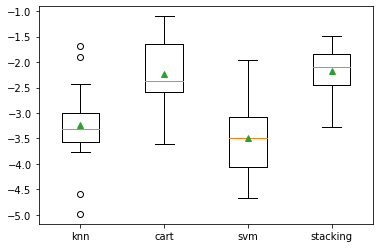

In [271]:
# FIRST STACKING MODEL, AS DESCRIBED ABOVE
random.seed(0)
# compare ensemble to each standalone models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot

# get a stacking ensemble of models
def get_stacking1():
	# define the base models
	level0 = list()
	level0.append(('knn', KNeighborsRegressor()))
	level0.append(('cart', DecisionTreeRegressor()))
	level0.append(('svm', SVR()))
	# define meta learner model
	level1 = LinearRegression()
	# define the stacking ensemble
	model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
	return model

# get a list of models to evaluate
def get_models1():
	models = dict()
	models['knn'] = KNeighborsRegressor()
	models['cart'] = DecisionTreeRegressor()
	models['svm'] = SVR()
	models['stacking'] = get_stacking1()
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=0)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
# We'll use the train_X and train_y datasets that we defined above for the previous models
# Create new dataset with only the predictors
X = fitbit_data_clean2.drop(['sleep_score'], axis = 1)
# specify target variable
y = fitbit_data_clean2.sleep_score
# NOTE: We will split into test and train sets first. Then fit model on train data, predict on test data.
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.10, random_state = 0)

# get the models to evaluate
models1 = get_models1()
# evaluate the models and store results
results1, names1 = list(), list()
for name, model in models1.items():
	scores1 = evaluate_model(model, train_X, train_y)
	results1.append(scores1)
	names1.append(name)
	print('>%s Mean Absolute Error: %.3f (%.3f)' % (name, abs(mean(scores1)), std(scores1)))
 
# plot model performance for comparison
pyplot.boxplot(results1, labels=names1, showmeans=True)
pyplot.show()

Notice that the Stacking Mean Absolute Error (MAE) is significantly higher than the bagging and random forest models. Let's try a different approach, by adjusting the base models used in level 0.

### Stacking Model 2

Our second stacking model will have the following:

Level 0:
- Linear Regression
- Random Forest
- KNN
- Decision Tree
- SVM

Level 1:
- Linear Regression

>knn Mean Absolute Error: 3.234 (0.647)
>lr Mean Absolute Error: 1.599 (0.295)
>rf Mean Absolute Error: 1.573 (0.376)
>cart Mean Absolute Error: 2.215 (0.531)
>svm Mean Absolute Error: 3.487 (0.692)
>stacking Mean Absolute Error: 1.292 (0.210)


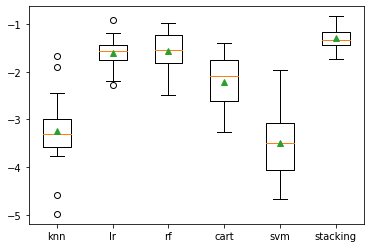

In [272]:
# SECOND STACKING MODEL, AS DESCRIBED ABOVE
random.seed(0)
# compare ensemble to each standalone models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot

# get a stacking ensemble of models
def get_stacking2():
	# define the base models
	level0 = list()
	level0.append(('knn', KNeighborsRegressor()))
	level0.append(('lr', LinearRegression()))
	level0.append(('rf', RandomForestRegressor()))
	level0.append(('cart', DecisionTreeRegressor()))
	level0.append(('svm', SVR()))
	# define meta learner model
	level1 = LinearRegression()
	# define the stacking ensemble
	model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
	return model

# get a list of models to evaluate
def get_models2():
	models = dict()
	models['knn'] = KNeighborsRegressor()
	models['lr'] = LinearRegression()
	models['rf'] = RandomForestRegressor()
	models['cart'] = DecisionTreeRegressor()
	models['svm'] = SVR()
	models['stacking'] = get_stacking2()
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=0)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores


# get the models to evaluate
models2 = get_models2()
# evaluate the models and store results
results2, names2 = list(), list()
for name, model in models2.items():
	scores2 = evaluate_model(model, train_X, train_y)
	results2.append(scores2)
	names2.append(name)
	print('>%s Mean Absolute Error: %.3f (%.3f)' % (name, abs(mean(scores2)), std(scores2)))
 
# plot model performance for comparison
pyplot.boxplot(results2, labels=names2, showmeans=True)
pyplot.show()

This actually decreased the MAE by quite a bit!

### Stacking Model 3

Our third stacking model will have the following:

Level 0:
- Linear Regression
- Bagging Regressor
- Random Forest
- KNN
- Decision Tree
- SVM

Level 1:
- Linear Regression

>knn Mean Absolute Error: 3.234 (0.647)
>bag Mean Absolute Error: 1.646 (0.393)
>lr Mean Absolute Error: 1.599 (0.295)
>rf Mean Absolute Error: 1.572 (0.376)
>cart Mean Absolute Error: 2.245 (0.545)
>svm Mean Absolute Error: 3.487 (0.692)
>stacking Mean Absolute Error: 1.307 (0.231)


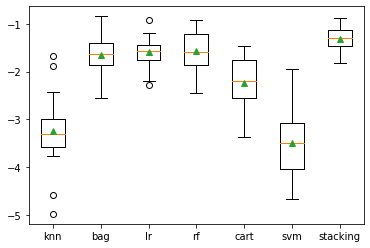

In [273]:
# THIRD STACKING MODEL, AS DESCRIBED ABOVE
random.seed(0)
# compare ensemble to each standalone models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot

# get a stacking ensemble of models
def get_stacking3():
	# define the base models
	level0 = list()
	level0.append(('knn', KNeighborsRegressor()))
	level0.append(('bag', BaggingRegressor()))
	level0.append(('lr', LinearRegression()))
	level0.append(('rf', RandomForestRegressor()))
	level0.append(('cart', DecisionTreeRegressor()))
	level0.append(('svm', SVR()))
	# define meta learner model
	level1 = LinearRegression()
	# define the stacking ensemble
	model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
	return model

# get a list of models to evaluate
def get_models3():
	models = dict()
	models['knn'] = KNeighborsRegressor()
	models['bag'] = BaggingRegressor()
	models['lr'] = LinearRegression()
	models['rf'] = RandomForestRegressor()
	models['cart'] = DecisionTreeRegressor()
	models['svm'] = SVR()
	models['stacking'] = get_stacking3()
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=0)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores


# get the models to evaluate
models3 = get_models3()
# evaluate the models and store results
results3, names3 = list(), list()
for name, model in models3.items():
	scores3 = evaluate_model(model, train_X, train_y)
	results3.append(scores3)
	names3.append(name)
	print('>%s Mean Absolute Error: %.3f (%.3f)' % (name, abs(mean(scores3)), std(scores3)))
 
# plot model performance for comparison
pyplot.boxplot(results3, labels=names3, showmeans=True)
pyplot.show()

This model does about the same as the previous stacking model, but let's compare metrics down below.

## Model Comparison

Let's compare metrics for all the models tried above. We can then use the best model to predict sleep score. 

In [274]:

# Bagging model 1
print('Mean Absolute Error: %.3f (%.3f)' % (abs(mean(bag_scores1)), std(bag_scores1)))

# Random Forest model 1
print('Mean Absolute Error: %.3f (%.3f)' % (abs(mean(rf_scores1)), std(rf_scores1)))

# Random Forest model 2
print('Mean Absolute Error: %.3f (%.3f)' % (abs(mean(rf_scores2)), std(rf_scores2)))

# Stacking model 1
print('Mean Absolute Error: %.3f (%.3f)' % (abs(mean(scores1)), std(scores1)))

# Stacking model 2
print('Mean Absolute Error: %.3f (%.3f)' % (abs(mean(scores2)), std(scores2)))

# Stacking model 3
print('Mean Absolute Error: %.3f (%.3f)' % (abs(mean(scores3)), std(scores3)))

Mean Absolute Error: 1.728 (0.440)
Mean Absolute Error: 1.559 (0.369)
Mean Absolute Error: 1.505 (0.341)
Mean Absolute Error: 2.176 (0.481)
Mean Absolute Error: 1.292 (0.210)
Mean Absolute Error: 1.307 (0.231)


Here we can see that **Stacking Model 2** performed the best (MAE of 1.292), making it the best model to predict *sleep_score*.